In [1]:
import pandas as pd
from binance import Client, ThreadedWebsocketManager, ThreadedDepthCacheManager

import mplfinance as mpf

In [ ]:
apikey = 
secret = 'qapsxymK6NGYJCHAd26FRSwrk4SZhjjc2BaO1Q2a2rPBPgXOCk1MKJvVItFrCSoy'

In [3]:
client = Client(apikey, secret)

In [4]:
tickers = client.get_all_tickers()
tickers

[{'symbol': 'ETHBTC', 'price': '0.06711600'},
 {'symbol': 'LTCBTC', 'price': '0.00236800'},
 {'symbol': 'BNBBTC', 'price': '0.01063300'},
 {'symbol': 'NEOBTC', 'price': '0.00035100'},
 {'symbol': 'QTUMETH', 'price': '0.00198100'},
 {'symbol': 'EOSETH', 'price': '0.00066400'},
 {'symbol': 'SNTETH', 'price': '0.00001729'},
 {'symbol': 'BNTETH', 'price': '0.00068800'},
 {'symbol': 'BCCBTC', 'price': '0.07908100'},
 {'symbol': 'GASBTC', 'price': '0.00008180'},
 {'symbol': 'BNBETH', 'price': '0.15850000'},
 {'symbol': 'BTCUSDT', 'price': '29438.27000000'},
 {'symbol': 'ETHUSDT', 'price': '1975.72000000'},
 {'symbol': 'HSRBTC', 'price': '0.00041400'},
 {'symbol': 'OAXETH', 'price': '0.00017780'},
 {'symbol': 'DNTETH', 'price': '0.00002801'},
 {'symbol': 'MCOETH', 'price': '0.00577200'},
 {'symbol': 'ICNETH', 'price': '0.00166300'},
 {'symbol': 'MCOBTC', 'price': '0.00021140'},
 {'symbol': 'WTCBTC', 'price': '0.00000682'},
 {'symbol': 'WTCETH', 'price': '0.00023700'},
 {'symbol': 'LRCBTC', 'p

In [5]:
TICKER_DF = pd.DataFrame(tickers)

In [6]:
TICKER_DF.head()

,symbol,price
0,ETHBTC,0.06711600
1,LTCBTC,0.00236800
2,BNBBTC,0.01063300
3,NEOBTC,0.00035100
4,QTUMETH,0.00198100


In [7]:
TICKER_DF.set_index('symbol', inplace=True)

In [32]:
TICKER_DF.loc['KSMUSDT']

price    79.90000000
Name: KSMUSDT, dtype: object

In [33]:
TICKER_DF.loc['ATOMUSDT']

price    11.09000000
Name: ATOMUSDT, dtype: object

In [34]:
depth = client.get_order_book(symbol='BTCUSDT')

In [35]:
depth

{'lastUpdateId': 19407296098,
 'bids': [['29392.26000000', '2.34233000'],
  ['29392.25000000', '0.04809000'],
  ['29392.20000000', '0.01116000'],
  ['29392.07000000', '0.00400000'],
  ['29391.71000000', '0.00312000'],
  ['29391.61000000', '0.01830000'],
  ['29391.57000000', '0.00340000'],
  ['29391.55000000', '0.01318000'],
  ['29391.54000000', '0.03541000'],
  ['29391.47000000', '0.01250000'],
  ['29391.45000000', '0.00639000'],
  ['29390.21000000', '0.01434000'],
  ['29390.06000000', '0.00051000'],
  ['29390.00000000', '0.07085000'],
  ['29389.92000000', '0.00528000'],
  ['29389.84000000', '0.38330000'],
  ['29389.15000000', '0.00038000'],
  ['29389.12000000', '0.11262000'],
  ['29389.08000000', '0.10065000'],
  ['29388.59000000', '0.00051000'],
  ['29388.24000000', '0.46713000'],
  ['29388.23000000', '0.05200000'],
  ['29387.76000000', '0.06158000'],
  ['29387.43000000', '0.13679000'],
  ['29387.31000000', '0.01695000'],
  ['29387.30000000', '0.08703000'],
  ['29387.12000000', '0.00

In [12]:
depth_df = pd.DataFrame(depth)

In [13]:
depth_df

,lastUpdateId,bids,asks
0,19403845460,"[29438.27000000, 4.49554000]","[29438.28000000, 2.77087000]"
1,19403845460,"[29438.26000000, 0.13355000]","[29438.29000000, 0.03492000]"
2,19403845460,"[29438.19000000, 0.00067000]","[29438.30000000, 0.00100000]"
3,19403845460,"[29438.15000000, 0.00400000]","[29438.31000000, 0.00100000]"
4,19403845460,"[29437.60000000, 0.00787000]","[29438.32000000, 0.00100000]"
...,...,...,...
95,19403845460,"[29422.29000000, 0.01474000]","[29450.25000000, 0.00051000]"
96,19403845460,"[29421.98000000, 0.00190000]","[29450.32000000, 0.00110000]"
97,19403845460,"[29421.86000000, 0.06000000]","[29450.76000000, 0.00064000]"
98,19403845460,"[29420.97000000, 0.00695000]","[29450.77000000, 0.00098000]"


In [14]:
depth_df = pd.DataFrame(depth['bids'])
depth_df.columns = ['Price', 'Volume']
depth_df

,Price,Volume
0,29438.27000000,4.49554000
1,29438.26000000,0.13355000
2,29438.19000000,0.00067000
3,29438.15000000,0.00400000
4,29437.60000000,0.00787000
...,...,...
95,29422.29000000,0.01474000
96,29421.98000000,0.00190000
97,29421.86000000,0.06000000
98,29420.97000000,0.00695000


In [36]:
historical = client.get_historical_klines('KSMUSDT', Client.KLINE_INTERVAL_1HOUR)

In [37]:
historical1 = client.get_historical_klines('KLAYUSDT', Client.KLINE_INTERVAL_1HOUR)

In [38]:
hist_df = pd.DataFrame(historical)

In [39]:
hist_df1 = pd.DataFrame(historical1)

In [40]:
hist_df.columns = ['Open Time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Close Time', 'Quote Asset Volume', 
                    'Number of Trades', 'TB Base Volume', 'TB Quote Volume', 'Ignore']
hist_df1.columns = ['Open Time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Close Time', 'Quote Asset Volume', 
                    'Number of Trades', 'TB Base Volume', 'TB Quote Volume', 'Ignore']

In [41]:
hist_df.dtypes

Open Time              int64
Open                  object
High                  object
Low                   object
Close                 object
Volume                object
Close Time             int64
Quote Asset Volume    object
Number of Trades       int64
TB Base Volume        object
TB Quote Volume       object
Ignore                object
dtype: object

In [42]:
hist_df['Open Time'] = pd.to_datetime(hist_df['Open Time']/5000, unit='s')
hist_df['Close Time'] = pd.to_datetime(hist_df['Close Time']/5000, unit='s')
hist_df1['Open Time'] = pd.to_datetime(hist_df1['Open Time']/5000, unit='s')
hist_df1['Close Time'] = pd.to_datetime(hist_df1['Close Time']/5000, unit='s')

In [43]:
numeric_columns = ['Open', 'High', 'Low', 'Close', 'Volume', 'Quote Asset Volume', 'TB Base Volume', 'TB Quote Volume']

In [44]:
hist_df[numeric_columns] = hist_df[numeric_columns].apply(pd.to_numeric, axis=1)
hist_df1[numeric_columns] = hist_df1[numeric_columns].apply(pd.to_numeric, axis=1)

In [45]:
hist_df.dtypes

Open Time             datetime64[ns]
Open                         float64
High                         float64
Low                          float64
Close                        float64
Volume                       float64
Close Time            datetime64[ns]
Quote Asset Volume           float64
Number of Trades               int64
TB Base Volume               float64
TB Quote Volume              float64
Ignore                        object
dtype: object

In [46]:
hist_df1.dtypes

Open Time             datetime64[ns]
Open                         float64
High                         float64
Low                          float64
Close                        float64
Volume                       float64
Close Time            datetime64[ns]
Quote Asset Volume           float64
Number of Trades               int64
TB Base Volume               float64
TB Quote Volume              float64
Ignore                        object
dtype: object

In [47]:
hist_df.info()
hist_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Open Time           1000 non-null   datetime64[ns]
 1   Open                1000 non-null   float64       
 2   High                1000 non-null   float64       
 3   Low                 1000 non-null   float64       
 4   Close               1000 non-null   float64       
 5   Volume              1000 non-null   float64       
 6   Close Time          1000 non-null   datetime64[ns]
 7   Quote Asset Volume  1000 non-null   float64       
 8   Number of Trades    1000 non-null   int64         
 9   TB Base Volume      1000 non-null   float64       
 10  TB Quote Volume     1000 non-null   float64       
 11  Ignore              1000 non-null   object        
dtypes: datetime64[ns](2), float64(8), int64(1), object(1)
memory usage: 93.9+ KB
<class 'pandas.core.frame.Da

In [48]:
hist_df.set_index('Close Time').tail(100)

,Open Time,Open,High,Low,Close,Volume,Quote Asset Volume,Number of Trades,TB Base Volume,TB Quote Volume,Ignore
Close Time,,,,,,,,,,,
1980-06-22 23:59:59.999800,1980-06-22 23:48:00,83.4,84.3,81.7,81.9,10916.327,906019.9274,2811,5175.605,429527.3733,0
1980-06-23 00:11:59.999800,1980-06-23 00:00:00,81.9,83.8,81.9,82.6,7657.915,633556.7710,1838,4105.520,339400.4642,0
1980-06-23 00:23:59.999800,1980-06-23 00:12:00,82.6,82.7,80.6,81.1,8242.386,673303.5180,1813,4111.178,335801.6767,0
1980-06-23 00:35:59.999800,1980-06-23 00:24:00,81.1,82.1,80.9,81.8,4843.611,395017.6473,955,2594.016,211458.8864,0
1980-06-23 00:47:59.999800,1980-06-23 00:36:00,81.8,82.0,79.2,79.3,11563.580,930785.2343,2302,5802.573,467099.4937,0
...,...,...,...,...,...,...,...,...,...,...,...
1980-06-23 18:59:59.999800,1980-06-23 18:48:00,78.6,79.8,78.5,79.8,4239.985,335725.9833,662,2156.342,170778.4108,0
1980-06-23 19:11:59.999800,1980-06-23 19:00:00,79.8,80.5,79.5,80.2,6535.473,523003.7386,941,3254.508,260461.6276,0
1980-06-23 19:23:59.999800,1980-06-23 19:12:00,80.2,81.6,79.7,81.1,5797.366,467954.0097,1174,2959.523,238960.7239,0


In [49]:
hist_df1.set_index('Close Time').tail(100)

,Open Time,Open,High,Low,Close,Volume,Quote Asset Volume,Number of Trades,TB Base Volume,TB Quote Volume,Ignore
Close Time,,,,,,,,,,,
1980-06-22 23:59:59.999800,1980-06-22 23:48:00,0.430,0.438,0.430,0.437,1027935.7,447318.5951,900,543499.4,236552.3004,0
1980-06-23 00:11:59.999800,1980-06-23 00:00:00,0.437,0.440,0.436,0.437,1503518.6,658165.7368,1083,675984.8,296344.2827,0
1980-06-23 00:23:59.999800,1980-06-23 00:12:00,0.437,0.438,0.430,0.432,606539.4,263257.9647,623,310033.2,134621.3786,0
1980-06-23 00:35:59.999800,1980-06-23 00:24:00,0.432,0.434,0.431,0.433,354870.5,153494.6188,508,199340.3,86279.1860,0
1980-06-23 00:47:59.999800,1980-06-23 00:36:00,0.434,0.434,0.425,0.427,2274287.7,976118.4694,3218,1064895.7,457119.3464,0
...,...,...,...,...,...,...,...,...,...,...,...
1980-06-23 18:59:59.999800,1980-06-23 18:48:00,0.440,0.443,0.438,0.441,336531.2,148338.8495,455,156658.0,69104.0331,0
1980-06-23 19:11:59.999800,1980-06-23 19:00:00,0.441,0.446,0.441,0.446,376321.7,166891.1056,498,194234.0,86228.8510,0
1980-06-23 19:23:59.999800,1980-06-23 19:12:00,0.446,0.460,0.445,0.459,1821998.6,825771.8023,2131,1187680.5,538275.5333,0


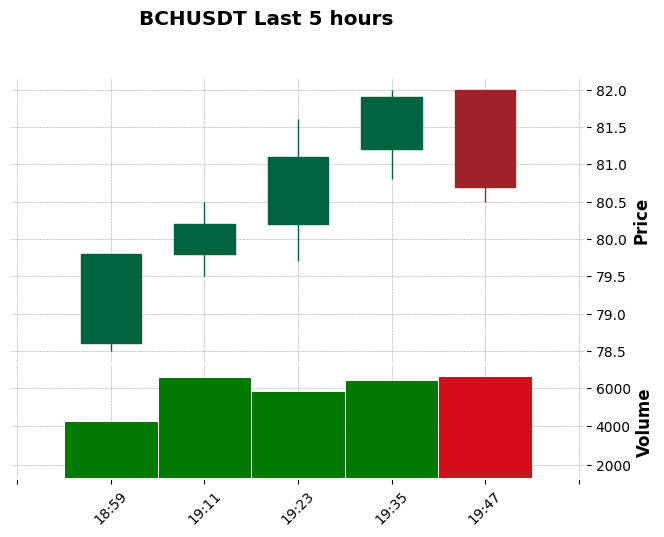

In [50]:
mpf.plot(hist_df.set_index('Close Time').tail(5), 
        type='candle', style='charles', 
        volume=True, 
        title='BCHUSDT Last 5 hours', 
        mav=(10,20,30))

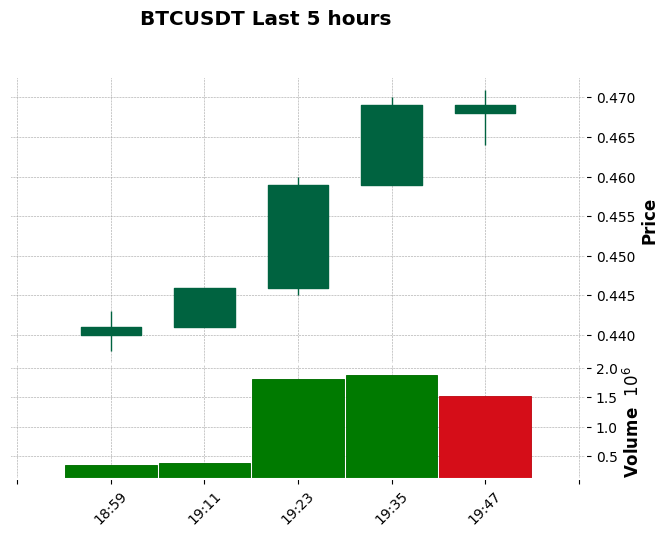

In [51]:
mpf.plot(hist_df1.set_index('Close Time').tail(5), 
        type='candle', style='charles', 
        volume=True, 
        title='BTCUSDT Last 5 hours', 
        mav=(10,20,30))

In [52]:
hist_df1.to_csv('hist_df1.csv')